In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt

<AxesSubplot:xlabel='Date', ylabel='rolling_avg'>

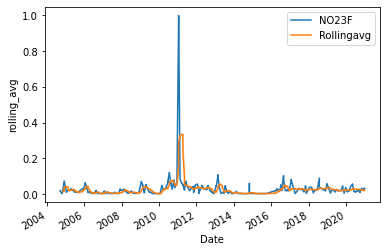

In [63]:
##SAP station

sap04 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2004.csv')
sap05 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2005.csv')
sap06 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2006.csv')
sap07 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2007.csv')
sap08 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2008.csv')
sap09 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2009.csv')
sap10 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2010.csv')
sap11 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2011.csv')
sap12 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2012.csv')
sap13 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2013.csv')
sap14 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2014.csv')
sap15 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2015.csv')
sap16 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2016.csv')
sap17 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2017.csv')
sap18 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2018.csv')
sap19 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2019.csv')
sap20 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/sapdcnut2020.csv')

frames_sap = (sap04, sap05, sap06, sap07, sap08, sap09, sap10, \
          sap11, sap12, sap13, sap14, sap15, sap16, sap17, sap18, sap19, sap20)

df_sap = pd.concat(frames_sap)
df_sap = df_sap[df_sap['NO23F'] < 2] ##removes several extremely large outliers
df_sap['Date'] = pd.to_datetime(df_sap['DateTimeStamp'])
df_sap

##creating a rolling average
df_sap['rolling_avg' ] = df_sap.NO23F.rolling(14).mean()

g = df_sap.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_sap,
             label = 'Rollingavg')

<AxesSubplot:xlabel='Date', ylabel='rolling_avg'>

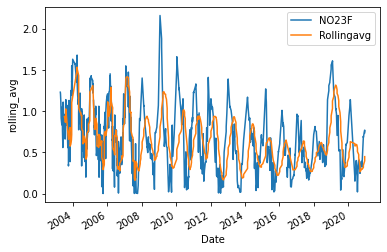

In [76]:
##CBM station
cbm03 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2003.csv')
cbm04 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2004.csv')
cbm05 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2005.csv')
cbm06 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2006.csv')
cbm07 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2007.csv')
cbm08 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2008.csv')
cbm09 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2009.csv')
cbm10 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2010.csv')
cbm11 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2011.csv')
cbm12 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2012.csv')
cbm13 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2013.csv')
cbm14 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2014.csv')
cbm15 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2015.csv')
cbm16 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2016.csv')
cbm17 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2017.csv')
cbm18 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2018.csv')
cbm19 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2019.csv')
cbm20 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/cbmrrnut2020.csv')

frames_cbm = (cbm03, cbm04, cbm05, cbm06, cbm07, cbm08, cbm09, cbm10, \
          cbm11, cbm12, cbm13, cbm14, cbm15, cbm16, cbm17, cbm18, cbm19, cbm20)

df_cbm = pd.concat(frames_cbm)
df_cbm['Date'] = pd.to_datetime(df_cbm['DateTimeStamp'])
df_cbm

##creating a rolling average
df_cbm['rolling_avg' ] = df_cbm.NO23F.rolling(14).mean()

g = df_cbm.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_cbm,
             label = 'Rollingavg')

<AxesSubplot:xlabel='Date', ylabel='rolling_avg'>

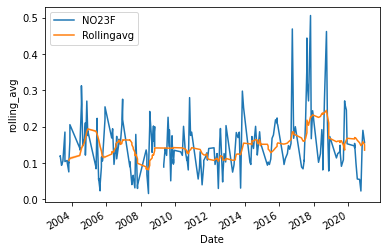

In [65]:
##GRB station
grb02 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2002.csv')
grb03 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2003.csv')
grb04 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2004.csv')
grb05 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2005.csv')
grb06 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2006.csv')
grb07 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2007.csv')
grb08 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2008.csv')
grb09 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2009.csv')
grb10 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2010.csv')
grb11 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2011.csv')
grb12 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2012.csv')
grb13 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2013.csv')
grb14 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2014.csv')
grb15 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2015.csv')
grb16 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2016.csv')
grb17 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2017.csv')
grb18 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2018.csv')
grb19 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2019.csv')
grb20 = pd.read_csv('/Users/asariversjulien/Documents/Data/CSV files/NERR/grbsqnut2020.csv')

frames_grb = (grb03, grb04, grb05, grb06, grb07, grb08, grb09, grb10, \
          grb11, grb12, grb13, grb14, grb15, grb16, grb17, grb18, grb19, grb20)

df_grb = pd.concat(frames_grb)
df_grb['Date'] = pd.to_datetime(df_grb['DateTimeStamp'])
df_grb

##creating a rolling average
df_grb['rolling_avg' ] = df_grb.NO23F.rolling(14).mean()

g = df_grb.plot(kind = 'line', y = 'NO23F', x = 'Date')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_grb,
             label = 'Rollingavg')

Text(0, 0.5, 'Nitrate + nitrite (mg/L)')

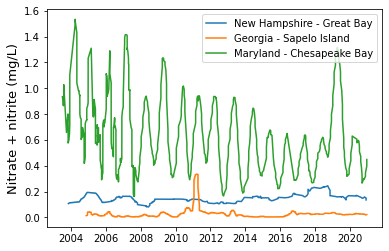

In [107]:
fig, ax = plt.subplots()

sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_grb,
             label = 'New Hampshire - Great Bay')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_sap,
             label = 'Georgia - Sapelo Island')
sns.lineplot( x = 'Date',
             y = 'rolling_avg',
             data = df_cbm,
             label = 'Maryland - Chesapeake Bay')

fig
plt.xlabel("")
plt.ylabel("Nitrate + nitrite (mg/L)", fontsize = 13)

In [115]:
frames_all = (cbm03, cbm04, cbm05, cbm06, cbm07, cbm08, cbm09, cbm10, cbm11, cbm12, cbm13, cbm14, cbm15, \
              cbm16, cbm17, cbm18, cbm19, cbm20, sap04, sap05, sap06, sap07, sap08, sap09, sap10, sap11, sap12, \
              sap13, sap14, sap15, sap16, sap17, sap18, sap19, sap20, grb03, grb04, grb05, grb06, grb07, grb08, \
              grb09, grb10, grb11, grb12, grb13, grb14, grb15, grb16, grb17, grb18, grb19, grb20)

df = pd.concat(frames_all)
df['Date'] = pd.to_datetime(df['DateTimeStamp'])

print(len(df['NO23F']))

2049


In [112]:
my_path = os.path.abspath('/Users/asariversjulien/Documents/Georgia/Project')
my_file = 'nuts.png'
fig.savefig(os.path.join(my_path, my_file), bbox_inches = 'tight')